# Computataional Neuroscience

PSYC B265, Fall 2025


## Setup colab notebook

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Rescorla-Wagner model

In Rescorla-Wagner model, learning is driven by prediction error (the difference between reality and expectation).

Formally, prediction error $\delta$ is the difference between reward $r$ and the expected value $V$:
$$\delta_{t} = r_{t} - V_{t}$$

Then, value $V$ is updated by the prediction error $\delta$, weighted by the learning rate $\alpha$:

$$V_{t+1} = V_{t} + \alpha \delta_{t}$$


### Acquisition: Forming Association

We first consider a case in which a single stimulus is associated with reward in a deterministic way (a stimulus is always associated with reward).

In [23]:
## -----
## parameters
## -----
alpha = 0.05 # learning rate

## -----
## experiment
## -----

# trials
nTrial = 100

# initialize vectors
# value
V = np.ones(nTrial) * np.nan
V[0] = 0

# prediction error
pe = np.ones(nTrial-1) * np.nan

# reward
R = np.ones(nTrial) # reward is always given (1)

## -----
## learning
## -----

for t in range(nTrial-1):
    # prediction error
    pe[t] = R[t]-V[t]
    # value
    V[t+1] = V[t] + alpha * pe[t]



Text(0.5, 1.0, 'acquisition (learning rate = 0.05)')

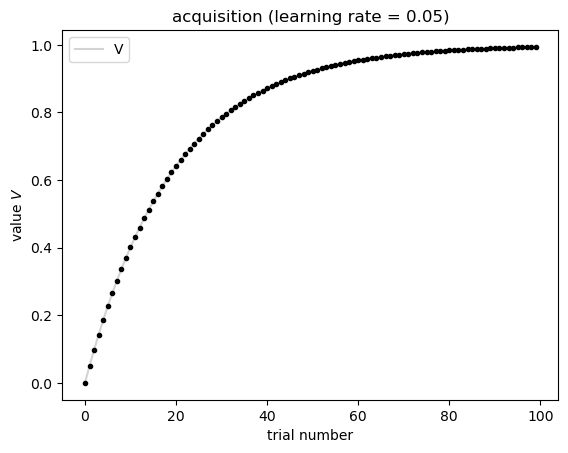

In [6]:
## -----
## plot
## -----

plt.plot(V, linestyle='-', color='lightgray', label='V')
plt.plot(V, 'k.')
plt.xlabel('trial number')
plt.ylabel('value $V$')
plt.legend()
plt.title(f'acquisition (learning rate = {alpha})')

#### TODO:
Where does $V$ approach?

> V approaches 1.0, which means the subject is now always expecting a reward at each trial. 

#### TODO:
What do you expect Prediction Error would look like over the course of trials? 

> I would expect prediction error to decrease over the course of the trials. Since V gets closer to 1, and the reward is always given (=1), the prediction error $r_t - V_t$ gets smaller. This corresponds to diminishing firing of dopamine neurons over time (dopamine codes for pe).

#### TODO:

Plot Prediction Error as a function of trial.

Text(0.5, 1.0, 'Prediction error: learning rate = 0.05')

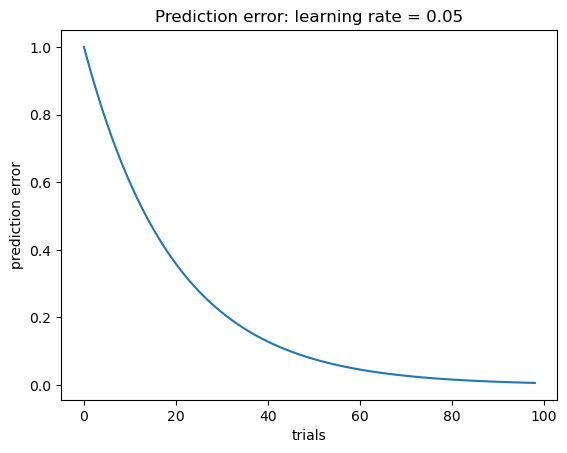

In [8]:
# Add your code

plt.plot(pe)
plt.xlabel('trials')
plt.ylabel('prediction error')
plt.title(f'Prediction error: learning rate = {alpha}')

### Extinction: Extinguishing a Formed Association

By the end of the acquisition phase, your belief about the association is strong. But you can "un-learn* the association if you stop pairing the stimulus with the reward.

#### TODO: 
Simulate belief over 100 trials in which the same stimulus completely stops being associated with reward.

In [11]:
# Add your code

# What's different? We are stopping reward (R is a matrix of zeros)
# We need the first entry of V to be the last entry of the past V
# nTrials, alpha are the same

# Prediction error matrix
pe_new = np.zeros(nTrial-1) * np.nan

# expected value matrix
V_new = np.zeros(nTrial) * np.nan
V_new[0] = V[-1]

# new reward matrix is all zeros
R_new = np.zeros(nTrial)

for t in range(nTrial-1):
    # prediction error
    pe_new[t] = R_new[t]-V_new[t]
    # value
    V_new[t+1] = V_new[t] + alpha * pe_new[t]

Text(0.5, 1.0, 'extinction (learning rate = 0.05)')

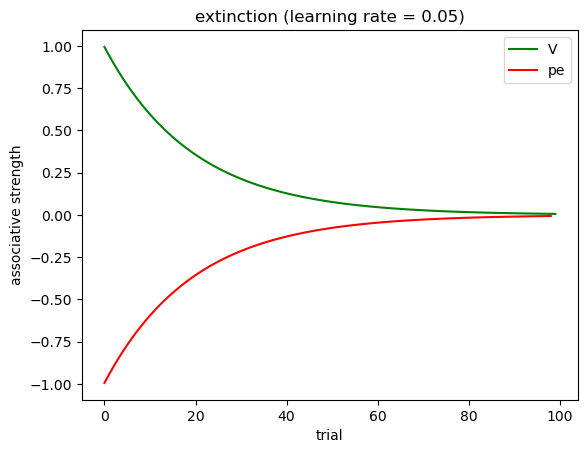

In [33]:
# plotting value and prediction error
plt.plot(V_new, label = 'V', color = 'g')
plt.plot(pe_new, label = 'pe', color = 'red')
plt.legend()
plt.xlabel('trial')
plt.ylabel('associative strength')
plt.title(f'extinction (learning rate = {alpha})')


### Partial Reinforcement

A more common scenario involves probabilistic reward, where a stimulus is only sometimes associated with reward.

Text(0.5, 1.0, 'partial reinforcement (learning rate = 0.05)')

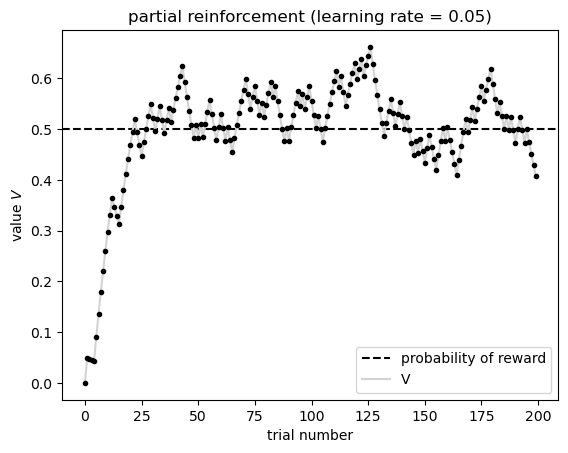

In [17]:
## -----
## parameters
## -----
alpha = 0.05

## -----
## experiment
## -----

# trials
nTrial = 200

# initialize vectors
# value
V = np.ones(nTrial) * np.nan
V[0] = 0

# prediction error
pe = np.ones(nTrial-1) * np.nan

# reward
np.random.seed(12345)
pR = 0.5
R = np.random.choice([0, 1], size=nTrial, p=[1-pR, pR])

## -----
## learing
## -----

for t in range(nTrial-1):
    # prediction error
    pe[t] = R[t]-V[t]
    # value
    V[t+1] = V[t] + alpha * pe[t]

## -----
## plot
## -----

plt.axhline(y=pR, linestyle='--', color='k', label='probability of reward')
plt.plot(V, linestyle='-', color='lightgray', label='V')
plt.plot(V, 'k.')
plt.xlabel('trial number')
plt.ylabel('value $V$')
plt.legend()
plt.title(f'partial reinforcement (learning rate = {alpha})')

#### TODO:

Change learning rate to 1 and plot Value learning curve again.

Text(0.5, 1.0, 'partial reinforcement (learning rate = 1)')

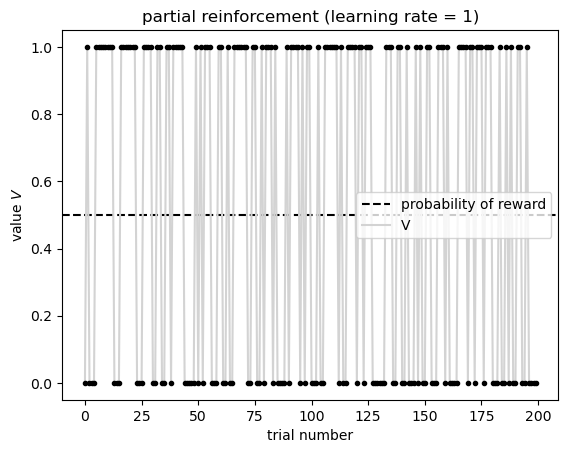

In [19]:
# Add your code
new_alpha = 1

for t in range(nTrial-1):
    # prediction error
    pe[t] = R[t]-V[t]
    # value
    V[t+1] = V[t] + new_alpha * pe[t]


plt.axhline(y=pR, linestyle='--', color='k', label='probability of reward')
plt.plot(V, linestyle='-', color='lightgray', label='V')
plt.plot(V, 'k.')
plt.xlabel('trial number')
plt.ylabel('value $V$')
plt.legend()
plt.title(f'partial reinforcement (learning rate = {new_alpha})')

#### TODO:

What's the issue with learning rate of 1?

> The subject completely changes their belief after each trial depending on whether the reward was given. This means they always expect what was given in the last trial, rather than an average of how often the reward was given. Basically, they forget everything except the last trial at each round.

#### TODO:

Change learning rate to 0.001 and plot Value learning curve again.

Text(0.5, 1.0, 'partial reinforcement (learning rate = 0.001)')

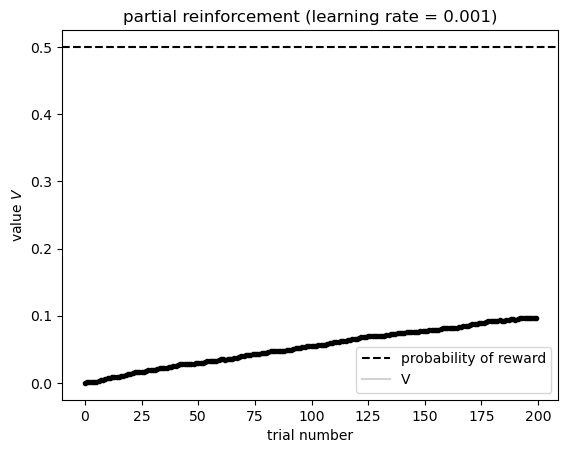

In [20]:
# Add your code

alpha = 0.001

for t in range(nTrial-1):
    # prediction error
    pe[t] = R[t]-V[t]
    # value
    V[t+1] = V[t] + alpha * pe[t]

# plotting

plt.axhline(y=pR, linestyle='--', color='k', label='probability of reward')
plt.plot(V, linestyle='-', color='lightgray', label='V')
plt.plot(V, 'k.')
plt.xlabel('trial number')
plt.ylabel('value $V$')
plt.legend()
plt.title(f'partial reinforcement (learning rate = {alpha})')

#### TODO:

What's the issue with learning rate of 0.001?

> The system weighs prior beliefs so heavily that even after 200 trials, it has difficulty actually learning based on whether reward was provided. It is still very far under the actual reward probability of 0.5.

## Cases with multiple stimuli

It's difficult to tell whether learning happens by mere asssociation or through prediction error in single stimulus cases. Paradigms that involve more than one stimulus can adjudicate between the two models.

Formally, prediction error $\delta$ is the difference between reward $r$ and the expected value $V$:
$$\delta_{t} = r_{t} - V_{t}$$

Then, each associative strength ($w_A$, $w_B$) is updated by the prediction error $\delta$, weighted by the learning rate $\alpha$:

$$w_{A, t+1} = w_{A, t} + \alpha \delta_{t}$$
$$w_{B, t+1} = w_{B, t} + \alpha \delta_{t}$$

The total value (how much you can expect a reward on this trial $t$) is the sum of the associative strengths:

$$V_{t+1} = \sum_{i}w_{i, t+1}$$

### Blocking

In phase 1, stimulus A is first paired with reward for 100 trials. In phase 2, for 50 trials, stimuli A and B are presented at the same time, which is followed by reward. 

final associative strength for A: 0.997 B: 0.003


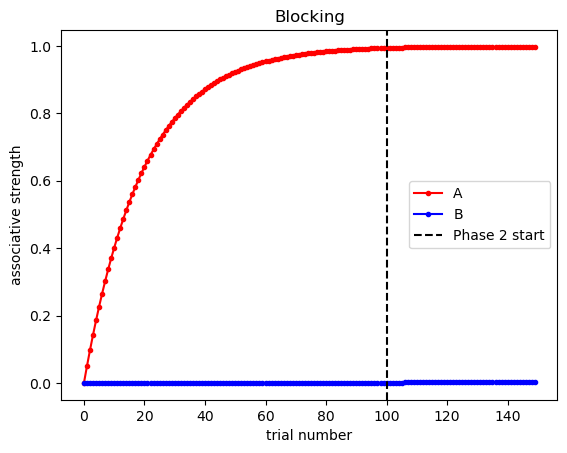

In [50]:
## -----
## parameters
## -----
alpha = 0.05

## -----
## experiment
## -----

# trials
nTrialPhase1 = 100
nTrialPhase2 = 50
nTrials = np.array([nTrialPhase1, nTrialPhase2])

# initialize vectors
# value
V = np.ones(np.sum(nTrials)) * np.nan

# associative strengths
w = np.ones([np.sum(nTrials),2]) * np.nan
w[0,:] = 0
# prediction error
pe = np.ones(np.sum(nTrials)-1) * np.nan

# stimuli
A = np.ones(np.sum(nTrials))
B = np.concatenate([np.zeros(nTrials[0]),np.ones(nTrials[1])])
S = np.column_stack([A,B])

# reward
R = [1 if S[t, 0] == 1 else 0 for t in range(np.sum(nTrials))]

## -----
## learing
## -----

for t in range(np.sum(nTrials)-1):
    # value is the sum of associative strengths
    V[t] = np.sum(w[t, :])
    # prediction error
    pe[t] = R[t]-V[t]
    
    for i in range(2):
        if S[t, i] == 1:
            w[t+1, i] = w[t, i] + alpha * pe[t]
        else:
            w[t+1, i] = w[t, i]

## -----
## plot
## -----

plt.plot(w[:,0], 'r.-', label='A')
plt.plot(w[:,1], 'b.-', label='B')
plt.axvline(x=nTrials[0], label='Phase 2 start', color='k', linestyle='--')
plt.xlabel('trial number')
plt.ylabel('associative strength')
plt.legend()
plt.title('Blocking')

print(f'final associative strength for A: {w[-1, 0]:0.3f} B: {w[-1, 1]:0.3f}')

#### TODO:

Plot Value and Prediction Error as a function of trial

Text(0.5, 1.0, 'Blocking')

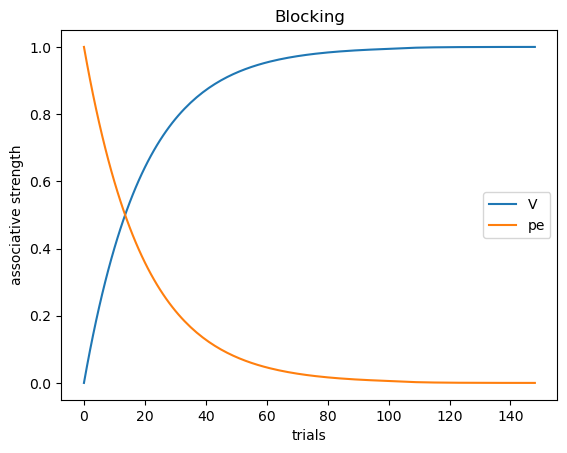

In [51]:
# Add your code

plt.plot(V, label = 'V')
plt.plot(pe, label = 'pe')
plt.legend()
plt.xlabel('trials')
plt.ylabel('associative strength')
plt.title('Blocking')

#### TODO:

Why is associative strength for B not increasing in Phase 2?

> The pre-existing associatino of A with reward, and receiving that expected reward only when A is present, is confirming the previous belief that stimulus A precedes a reward. The presence of stimulus B never triggers prediction error changes - the subject always received the reward that they expect, and without pe, there is no learning. The updating the future beliefs depends precisely on pe; if pe = 0, V[t+1] = V[t], and there is no updating

## Exercise 1: Second Order Conditioning

We want to simulate the Second Order Conditioning with the RW model. The experiment pairs stimuli A and reward for the first 200 trials (Phase 1), and the later 50 trials pair stimuli A and B together, but no reward is given (Phase 2). Plot associative strength for each stimuli, total value, and prediction error as a function of trial.

final associative strength for A: 0.503 B: -0.497


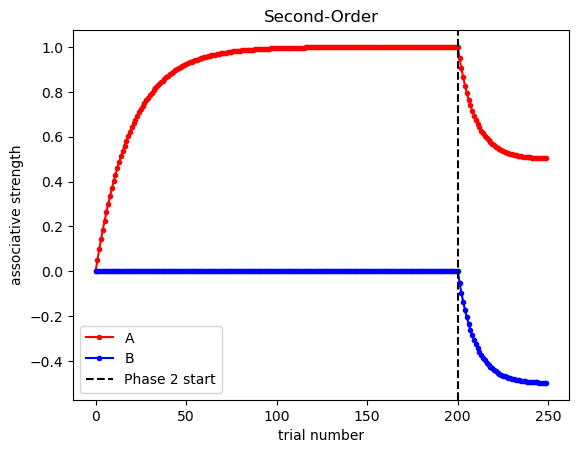

In [58]:
## -----
## parameters
## -----
alpha = 0.05

## -----
## experiment
## -----

# trials
nTrialPhase1 = 200
nTrialPhase2 = 50
nTrials = np.array([nTrialPhase1, nTrialPhase2])

# initialize vectors
# value
V = np.ones(np.sum(nTrials)) * np.nan

# associative strengths
w = np.ones([np.sum(nTrials),2]) * np.nan
w[0,:] = 0 
# prediction error
pe = np.ones(np.sum(nTrials)-1) * np.nan

# stimuli - appplied the same way
A = np.ones(np.sum(nTrials))
B = np.concatenate([np.zeros(nTrials[0]),np.ones(nTrials[1])])
S = np.column_stack([A,B])


# reward

R = np.concatenate([np.ones(nTrials[0]), np.zeros(nTrials[1])]) # another option!



## -----
## learing
## -----

for t in range(np.sum(nTrials)-1):
    # value is the sum of associative strengths
    V[t] = np.sum(w[t, :])
    # prediction error
    pe[t] = R[t]-V[t]
    
    for i in range(2):
        if S[t, i] == 1:
            w[t+1, i] = w[t, i] + alpha * pe[t]
        else:
            w[t+1, i] = w[t, i]

## -----
## plot
## -----

plt.plot(w[:,0], 'r.-', label='A')
plt.plot(w[:,1], 'b.-', label='B')
plt.axvline(x=nTrials[0], label='Phase 2 start', color='k', linestyle='--')
plt.xlabel('trial number')
plt.ylabel('associative strength')
plt.legend()
plt.title('Second-Order')

print(f'final associative strength for A: {w[-1, 0]:0.3f} B: {w[-1, 1]:0.3f}')

<div class="alert alert-block alert-warning">
    <b>Check:</b> Plot total value and prediction error over trials.
</div>

#### TODO:

Is this second order conditioning pattern realistic? Why or why not?

> This isn't very realistic because both A and B are being unlearned, even though B was never associated with reward. In this model, dopamine neurons should be silenced with the presence of B. This shows us that we cannot use the Rescorla-Wagner model for second-order conditioning.

## Exercise 2: Separate Learning Rates

Simulate acquisition and extinction (20 trials each) for an agent who has the learning rate of ***0.1 for positive prediction error*** and ***0.5 for negative prediction error*** (Hint: use `if`). Use the Rescorla-Wagner model. Plot value and prediction error as a function of trial.

In [ ]:
# Add your code


#### TODO:

How would this agent learn from reward and punishment?

> **YOUR ANSWER HERE**

<div class="alert alert-block alert-info">
    <b>Grade:</b> 5/5 <br>
    Excellent!
</div>